In [ ]:
#импортируем необходимы библеотеки
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score,rand_score
import warnings
warnings.filterwarnings('ignore')

## **Описание датасета**

Со всех исходных датасетов, мной был взят средний показатель за 2017 - 2021, либо за 2017 - 2020 года

1. **child_mortality** - коэффициент детской смертности, число детей, умерших в возрасте до 1 года, на 1000 родившихся 
2. **new_born** - Коэффициент рождаемости на 1000 человек
3. **crime** - коэффициент числа совершенных преступлений на 1000 человек
4. **disable** - доля инвалидов на 1000 человек
5. **morbidity** - Заболеваемость на 1000 человек населения
6. **poverty_percent** - Процент людей, живущих за чертой бедности (с денежными доходами ниже величины прожиточного минимума)
7. **welfare_expense_share** - Расходы на социальную политику от общих расходов бюджета региона, %
8. **per_capita** - Среднедушевые денежные доходы 
9. **real_income** - Реальные денежные доходы, в процентах
10. **formal_wage_paid** - Среднемесячная номинальная начисленная заработная плата,в рублях
11. **real_pay** - Реальная начисленная заработная плата, в процентах
12. **poor_children** - процент детей среди малообеспеченного населения
13. **poor_pensioners** - процент пенсионеров среди малообеспеченного населения
14. **poor_employable** - процент людей трудоспособного возраста среди малообеспеченного населения
15. **Living_Area_Per_Member** - Размер жилой площади в расчете на члена домохозяйства
16. **Poor_Condition** - домохозяйства, указавшие на плохое состояние жилья
17. **grp** - Валовой региональный продукт на душу населения, в рублях
18. **self-produced_good** - доля отгруженных товаров собственного производства
19. **retail** - розничная торговля на душу населения, в рублях
20. **drugs** - количество впервые зарегистрированных наркотических психозов на 100 тыс. населения
21. **alcoholism** - количество впервые зарегистрированных алкогольных психозов на 100 тыс. населения
22. **workers**	- Отношение числа занятых в экономике региона к численности населения региона в трудоспособном возрасте, %
23. **population** - численность населения по регионам, тыс.человек
24. **pension_for_old** - пенсия по возрассту 
25. **social_pension** - социальные пенсии
26. **number_of_children** - процент детей среди всего населения
27. **number_of_pensioners** - процент пенсионеров среди всего населения
28. **number_able_bodied** - процент трудоспособного населения среди всего населения
29. **without_work**  - процент безработных
30. **housing_amenities**  - Доля площади жилищного фонда, обеспеченного всеми видами благоустройства, в общей площади жилищного фонда субъекта Российской Федерации

## **EDA + Моделирование** 

In [306]:
#прочитаем данные 
combined_data = pd.read_csv('social_russia_data/combined_data.csv')
combined_data.head()

,Unnamed: 0,region,child_mortality,new_born,crime,disable,morbidity,poverty_percent,welfare_expense_share,per_capita,...,alcoholism,workers,population,pension_for_old,social_pension,number_of_children,number_of_pensioners,number_able_bodied,without_work,housing_amenities
0,0,Алтайский край,5.925577,9.684144,13.557762,78.081054,10279.519,17.500,29.675,23192.25,...,82.10,80.28,2249702.2,14622.46,9995.68,19.00,27.10,53.90,6.90,48.258
1,1,Амурская область,5.189191,10.527970,14.957814,83.642497,8827.875,15.800,23.700,32238.25,...,86.32,85.58,786499.2,16258.98,10538.58,20.36,22.74,56.92,10.06,56.072
2,2,Архангельская область,4.804384,9.755237,12.207066,80.293641,0.000,13.550,23.200,34653.25,...,77.52,82.86,1073211.2,19491.62,10790.18,18.86,26.36,54.78,8.38,53.394
3,3,Астраханская область,5.745307,11.484550,10.107269,44.347703,6430.322,15.425,27.825,24181.00,...,17.08,83.10,987793.2,14195.14,9923.48,20.44,24.14,55.42,9.18,60.582
4,4,Белгородская область,4.274276,8.661739,5.203893,133.451369,8218.121,7.575,15.475,31578.25,...,41.58,87.76,1551543.4,15725.88,9221.64,16.84,27.56,55.60,3.28,78.668


In [307]:
#Удалим ненужный столбец
combined_data = combined_data.iloc[:,1:]

In [308]:
#Установим индекс - регион, для того, чтобы столбцы были только числовые
combined_data = combined_data.set_index('region')

In [309]:
#размерность данных
combined_data.shape

(85, 30)

In [310]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Алтайский край to Ярославская область
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   child_mortality         85 non-null     float64
 1   new_born                85 non-null     float64
 2   crime                   85 non-null     float64
 3   disable                 85 non-null     float64
 4   morbidity               85 non-null     float64
 5   poverty_percent         85 non-null     float64
 6   welfare_expense_share   85 non-null     float64
 7   per_capita              85 non-null     float64
 8   real_income             85 non-null     float64
 9   formal_wage_paid        85 non-null     float64
 10  real_pay                85 non-null     float64
 11  poor_children           85 non-null     float64
 12  poor_pensioners         85 non-null     float64
 13  poor_employable         85 non-null     float64
 14  Living_Area_Per_Mem

In [311]:
print(f'В датасете {combined_data.isnull().sum().sum()} пропущенных значений')

В датасете 0 пропущенных значений


In [312]:
combined_data.describe()

,child_mortality,new_born,crime,disable,morbidity,poverty_percent,welfare_expense_share,per_capita,real_income,formal_wage_paid,...,alcoholism,workers,population,pension_for_old,social_pension,number_of_children,number_of_pensioners,number_able_bodied,without_work,housing_amenities
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,5.157716,10.529664,9.290539,76.229928,8101.451106,14.262647,22.300000,31376.979412,99.988824,40802.323529,...,62.355137,83.187529,1.764152e+06,16397.216235,10353.378588,19.482118,24.458588,56.060235,8.026824,63.359365
std,1.415816,2.353358,3.989548,22.138368,2279.193034,5.112627,4.756218,13669.527120,1.616532,17891.470801,...,36.537356,12.327023,1.865019e+06,2698.633669,1476.670676,3.621326,4.651493,2.145481,7.504044,14.365474
min,3.128197,7.217998,0.773240,25.056169,0.000000,5.550000,6.475000,16363.750000,96.575000,26222.000000,...,0.360000,57.280000,4.182680e+04,13040.680000,8758.820000,14.940000,10.400000,51.580000,1.680000,22.158000
25%,4.378548,9.078979,6.674748,63.531933,6980.712000,10.475000,21.075000,23874.250000,98.700000,29447.000000,...,40.820000,77.040000,7.027230e+05,14844.680000,9332.020000,16.980000,22.740000,54.700000,4.740000,53.394000
50%,4.834490,10.087273,8.372970,78.081054,8154.602000,13.725000,23.250000,27232.250000,99.575000,34062.250000,...,59.240000,82.620000,1.167184e+06,15548.880000,9941.600000,18.860000,25.280000,55.580000,6.160000,63.268000
75%,5.745307,11.028945,12.080074,91.118612,9336.798000,16.300000,25.650000,32238.250000,101.025000,43418.750000,...,77.520000,86.660000,2.336123e+06,16441.660000,10810.860000,20.440000,27.820000,57.160000,8.340000,71.834000
max,13.036051,20.380062,21.056982,133.451369,15019.672000,34.000000,30.375000,82110.250000,103.700000,104651.750000,...,263.240000,125.400000,1.277930e+07,27286.500000,16497.780000,34.380000,30.540000,64.180000,52.040000,96.316000


В целях приведения некоторых данных к масштабу, соответствующим большинству признаков, необходимо нормировать некторые признаки, особенно экономические

In [313]:
#Выполним нормирование некоторых экономических показателей, а именно перевод в проценты
combined_data['per_capita'] = combined_data['per_capita'] / combined_data['per_capita'].max() * 100
combined_data['formal_wage_paid'] = combined_data['formal_wage_paid'] / combined_data['formal_wage_paid'].max() * 100
combined_data['retail'] = combined_data['retail'] / combined_data['retail'].max() * 100
combined_data['social_pension'] = combined_data['social_pension'] / combined_data['social_pension'].max() *100 
combined_data['pension_for_old'] = combined_data['pension_for_old'] / combined_data['pension_for_old'].max() * 100


In [314]:
def make_barplot(data,feature,**kwargs):
    '''Функция для отрисовки столбчатой диаграммы'''
    data = data.sort_values(by=feature,ascending=False)
    plt.figure(figsize=(12,6))
    sns.barplot(data = data,x=data.index,y=feature,palette='viridis')
    plt.xlabel(kwargs.get('xlabel'))
    plt.ylabel(kwargs.get('ylabel'))
    plt.title(kwargs.get('title'))
    plt.xticks(rotation=90,fontsize=8)
    plt.show()

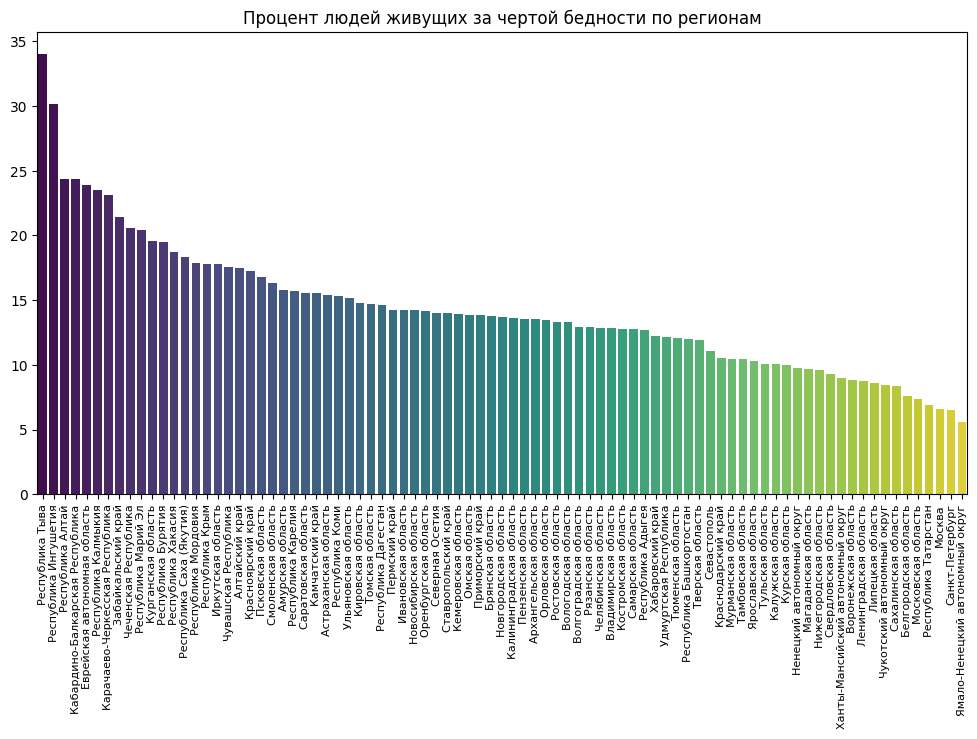

In [315]:
make_barplot(combined_data,'poverty_percent',title='Процент людей живущих за чертой бедности по регионам')

Согласно, графику, за чертой бедности проживают на территории преимущественно Дальнего Востока и Северного Кавказа. Менее всего в Москве, Ямало-ненецком автономном округе, Санкт-Петербурге

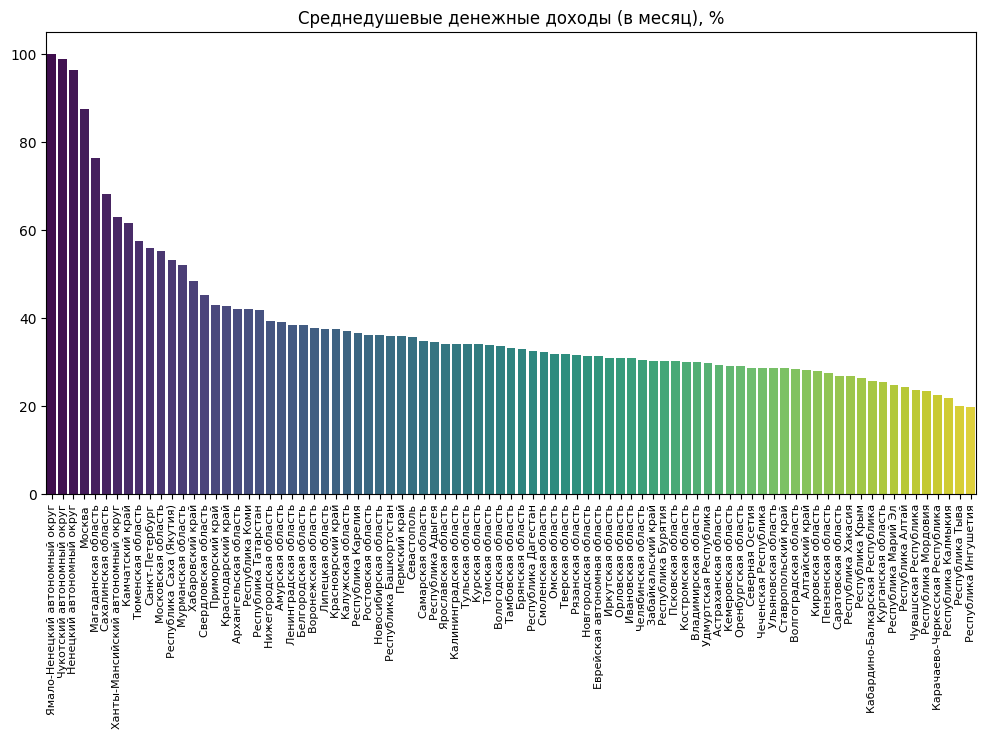

In [316]:
make_barplot(combined_data,'per_capita',title='Среднедушевые денежные доходы (в месяц), %')

По среднедушевым денежным доходам, в лидерах Ямало-Ненецкий Автономный округ, Чукотский автономный округ, Ненецкий автономный округ, Москва. В хвосте рейтинга - республики Северного Кавказа и регионы Дальнего Востока

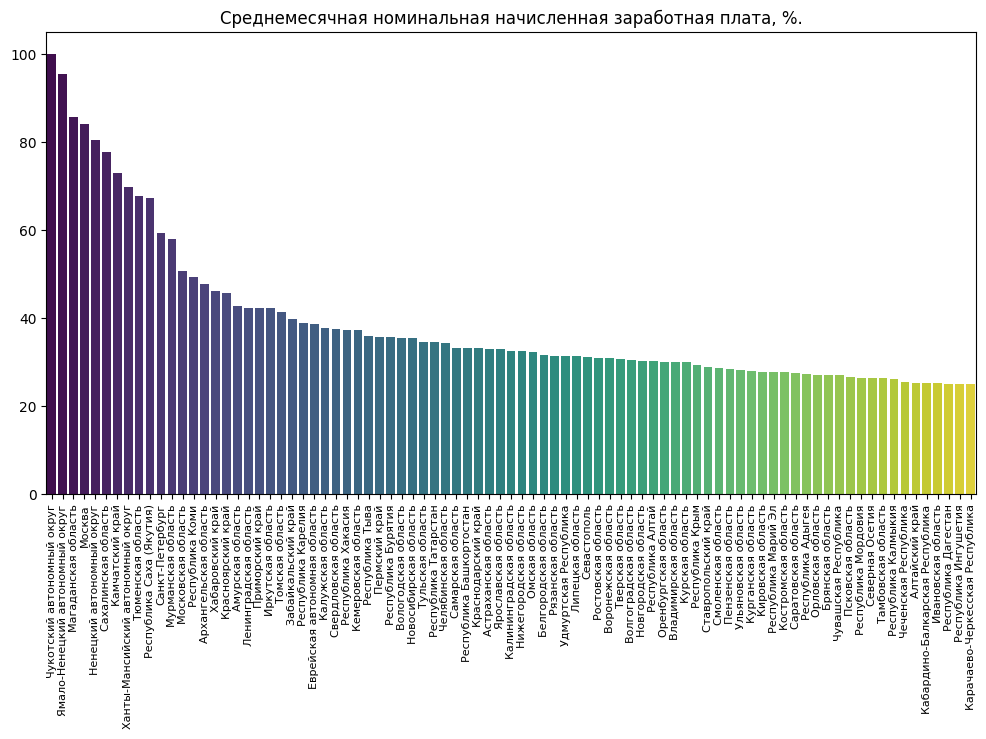

In [317]:
make_barplot(combined_data,'formal_wage_paid',title='Среднемесячная номинальная начисленная заработная плата, %.')

большие зарплаты получают в Чукотском автономном округе, Ямало-Ненецком автономном округе, Магаданской области, Москве. Маленькие - в республиках Северного Кавказа и Дальнего Востока

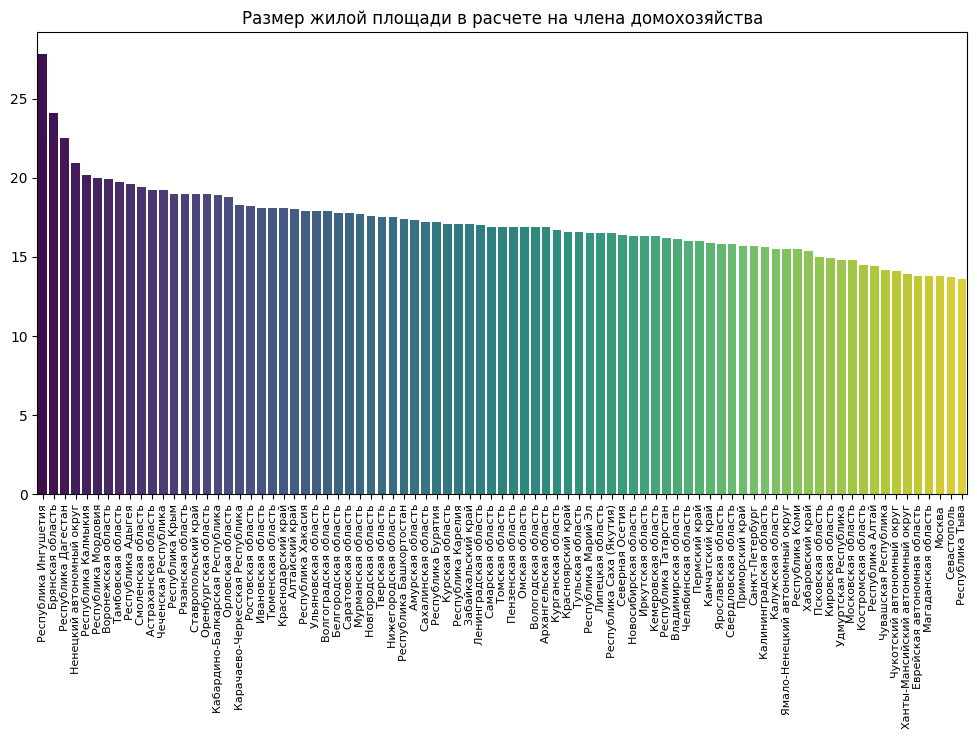

In [318]:
make_barplot(combined_data,'Living_Area_Per_Member',title='Размер жилой площади в расчете на члена домохозяйства')

Наиболее обеспеченные жилплощадь: в Ингушетии, Дагестане (данные республики входят в первые позиции антирейтинга по уровню бедности). В конце рейтинга Тыва, которая также является одним из лидеров антирейтинга по уровню бедности, и как ни странно, Москва

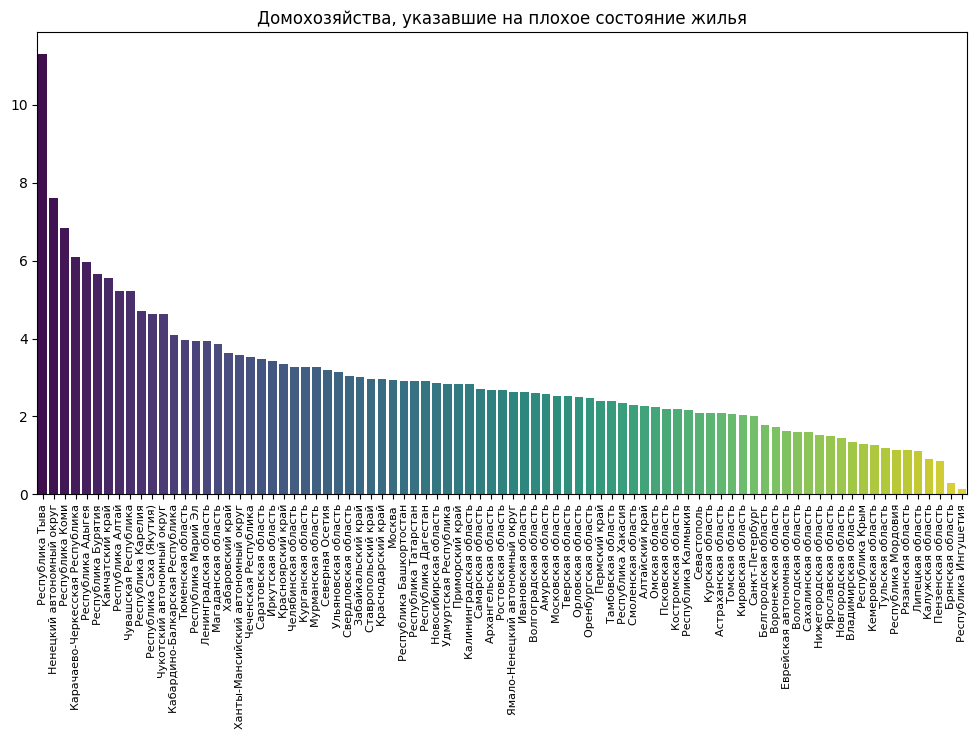

In [319]:
make_barplot(combined_data,'Poor_Condition',title='Домохозяйства, указавшие на плохое состояние жилья')

Состоянием жилья недовольны в Тыве, Ненецком автономном округе, Республике Коми.

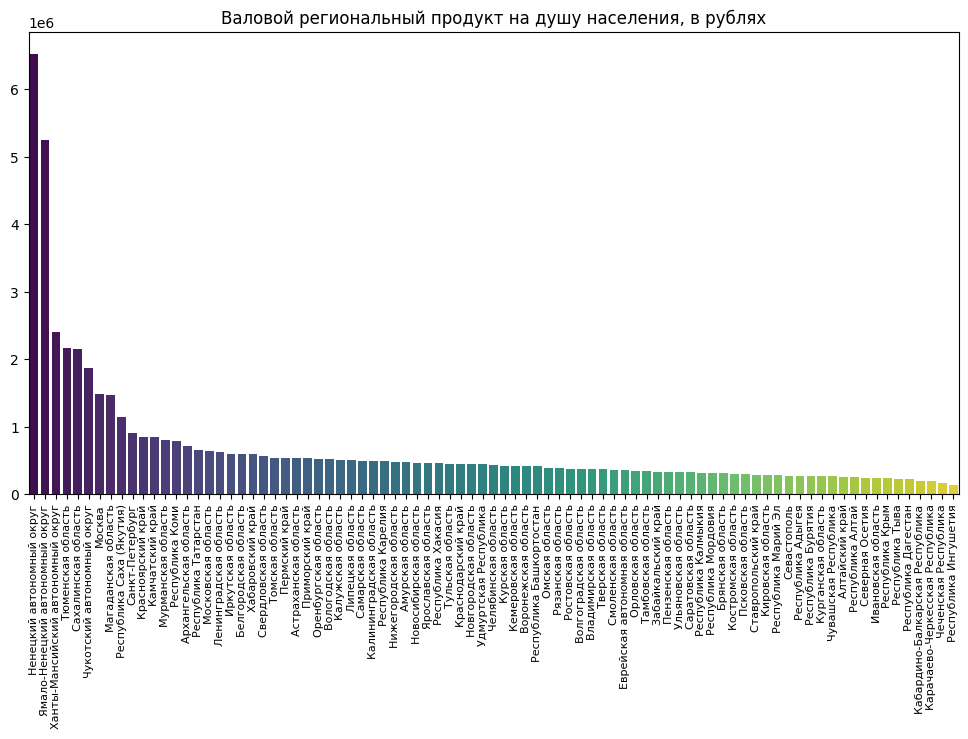

In [320]:
make_barplot(combined_data,'grp',title='Валовой региональный продукт на душу населения, в рублях')

По ВРП в лидерах: Ненецкий автономный округ, Ямало-Ненецкий автономный округ, Ханты-Мансийский автономный округ, Тюменская область. В конце рейтинга республики Северного Кавказа

Распределения и преобразования признаков

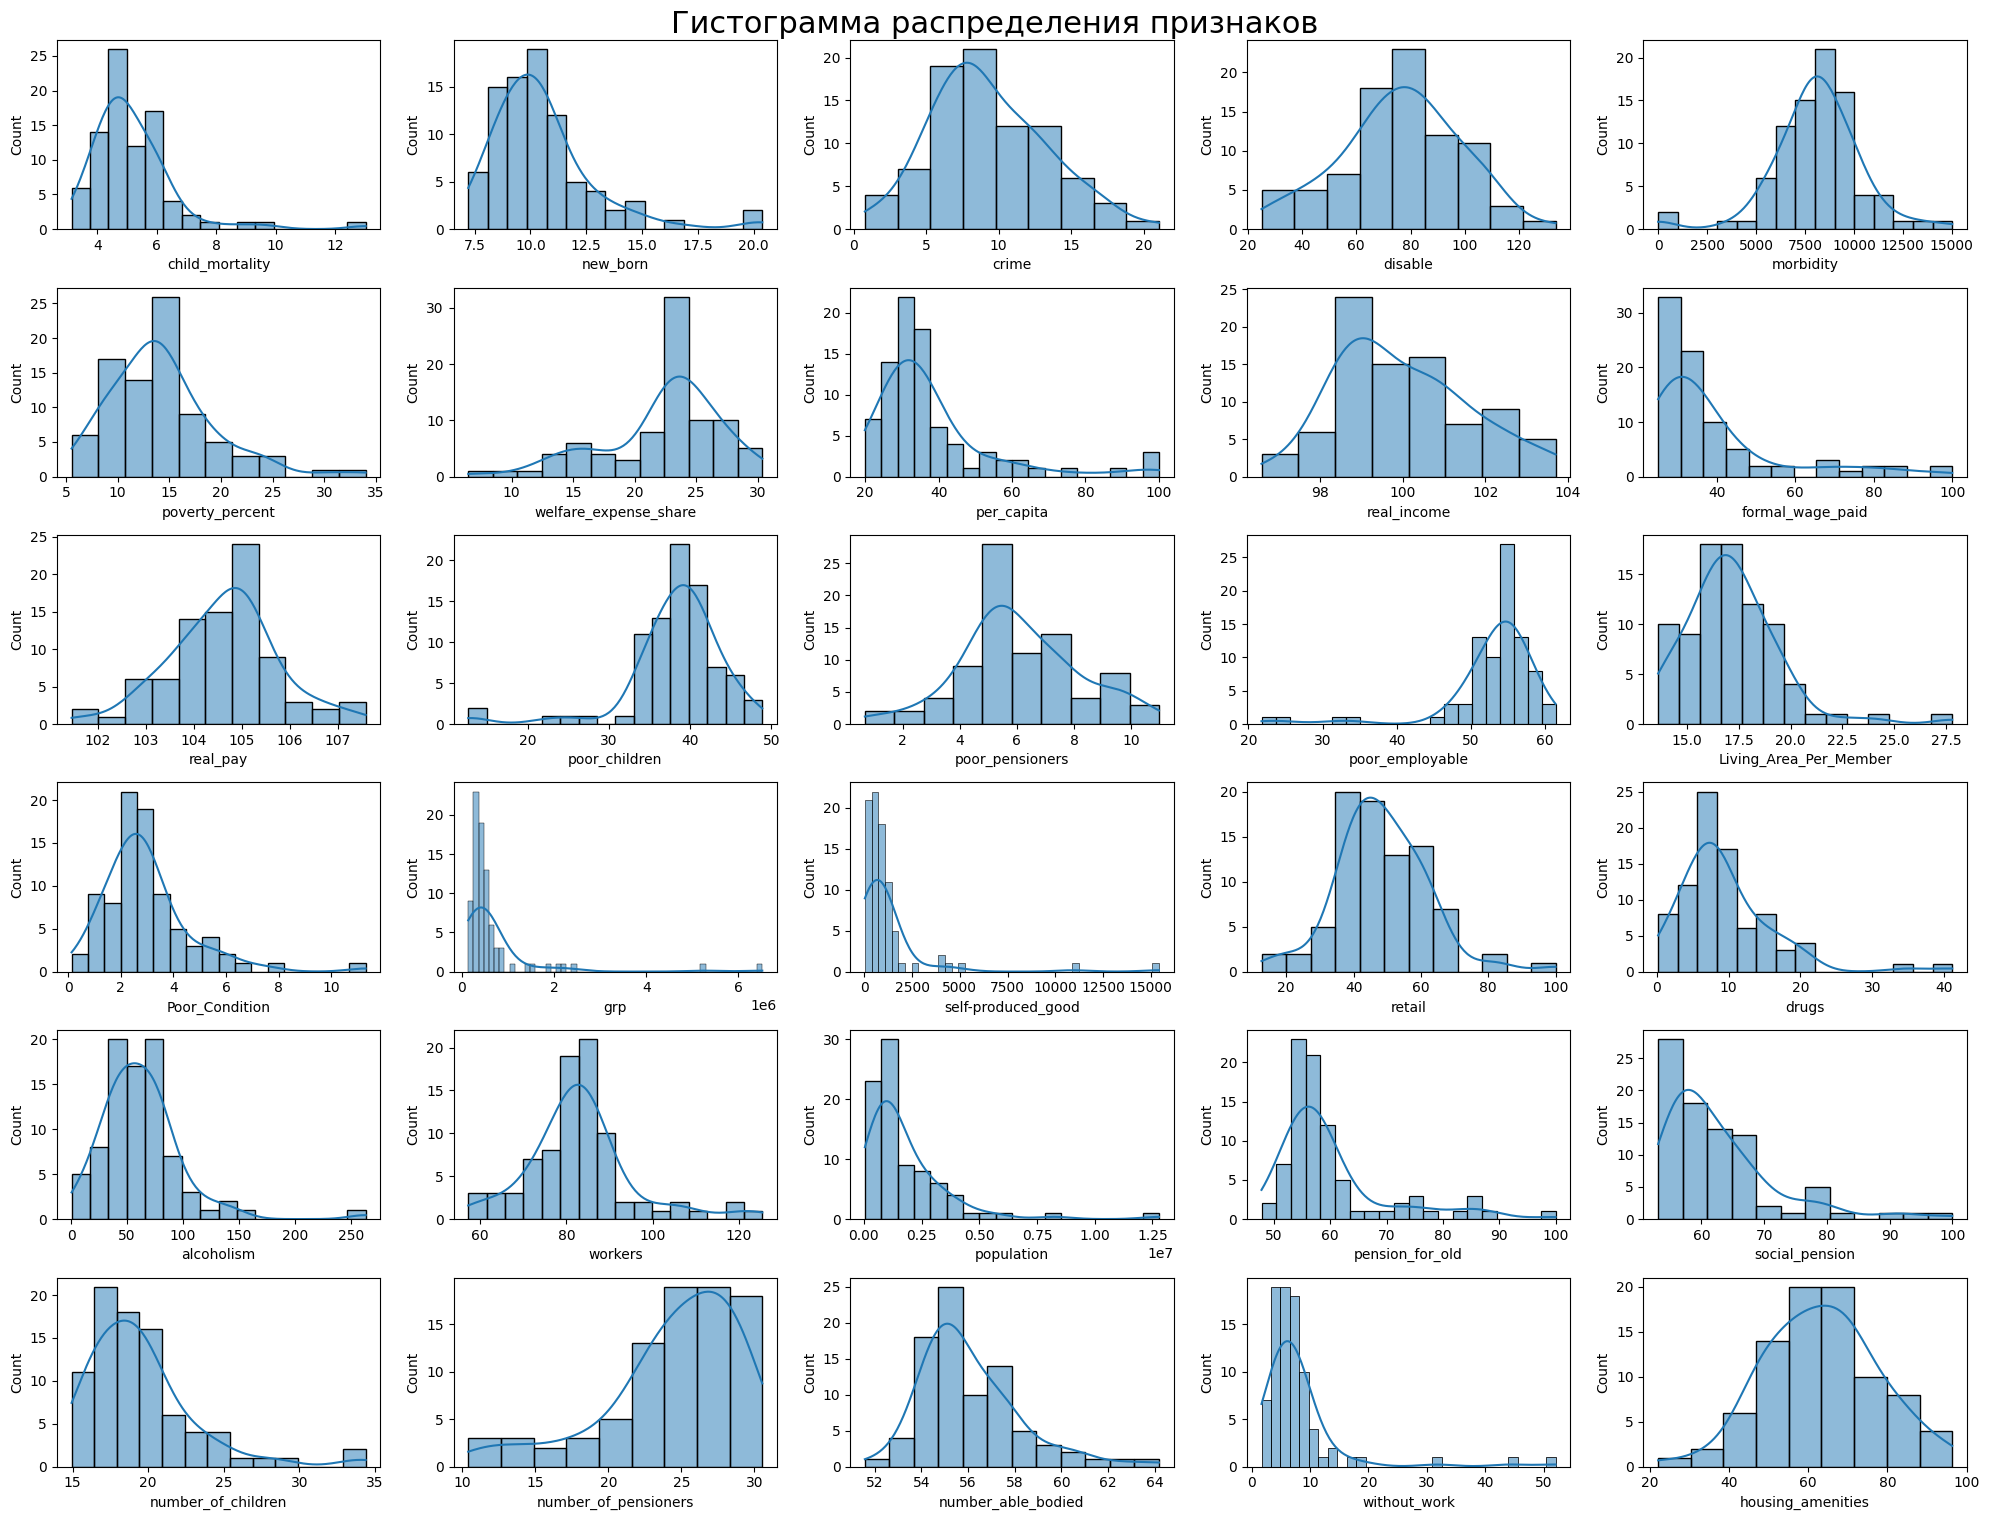

In [321]:
rows = 6
cols= 5

hist_data = combined_data

fig,axes = plt.subplots(rows,cols,figsize=(20,15))
axes = axes.flatten()

for i,col in enumerate(hist_data.columns):
    sns.histplot(data=hist_data,x=col,kde=True,ax=axes[i])
plt.tight_layout()
plt.suptitle('Гистограмма распределения признаков',fontsize=22,x=0.5,y=1.01)
plt.show()

Многие распределения имеют скошенность, и не являются нормальными. Для многих признаков, у которых имеется перекос вправо, будет примянено логарифмирование

In [322]:
log_combined_data = combined_data.copy()

In [323]:
#цикл по датасету 
for col in log_combined_data.columns:
    #Для тех данных, что имеют скошенность впараво(логнормальное распределение) 
    if log_combined_data[col].skew() > 1:
        #применяем логарифмирование
        log_combined_data[col] = np.log(log_combined_data[col]+1)
        log_combined_data = log_combined_data.rename(columns={col:'log_'+col})


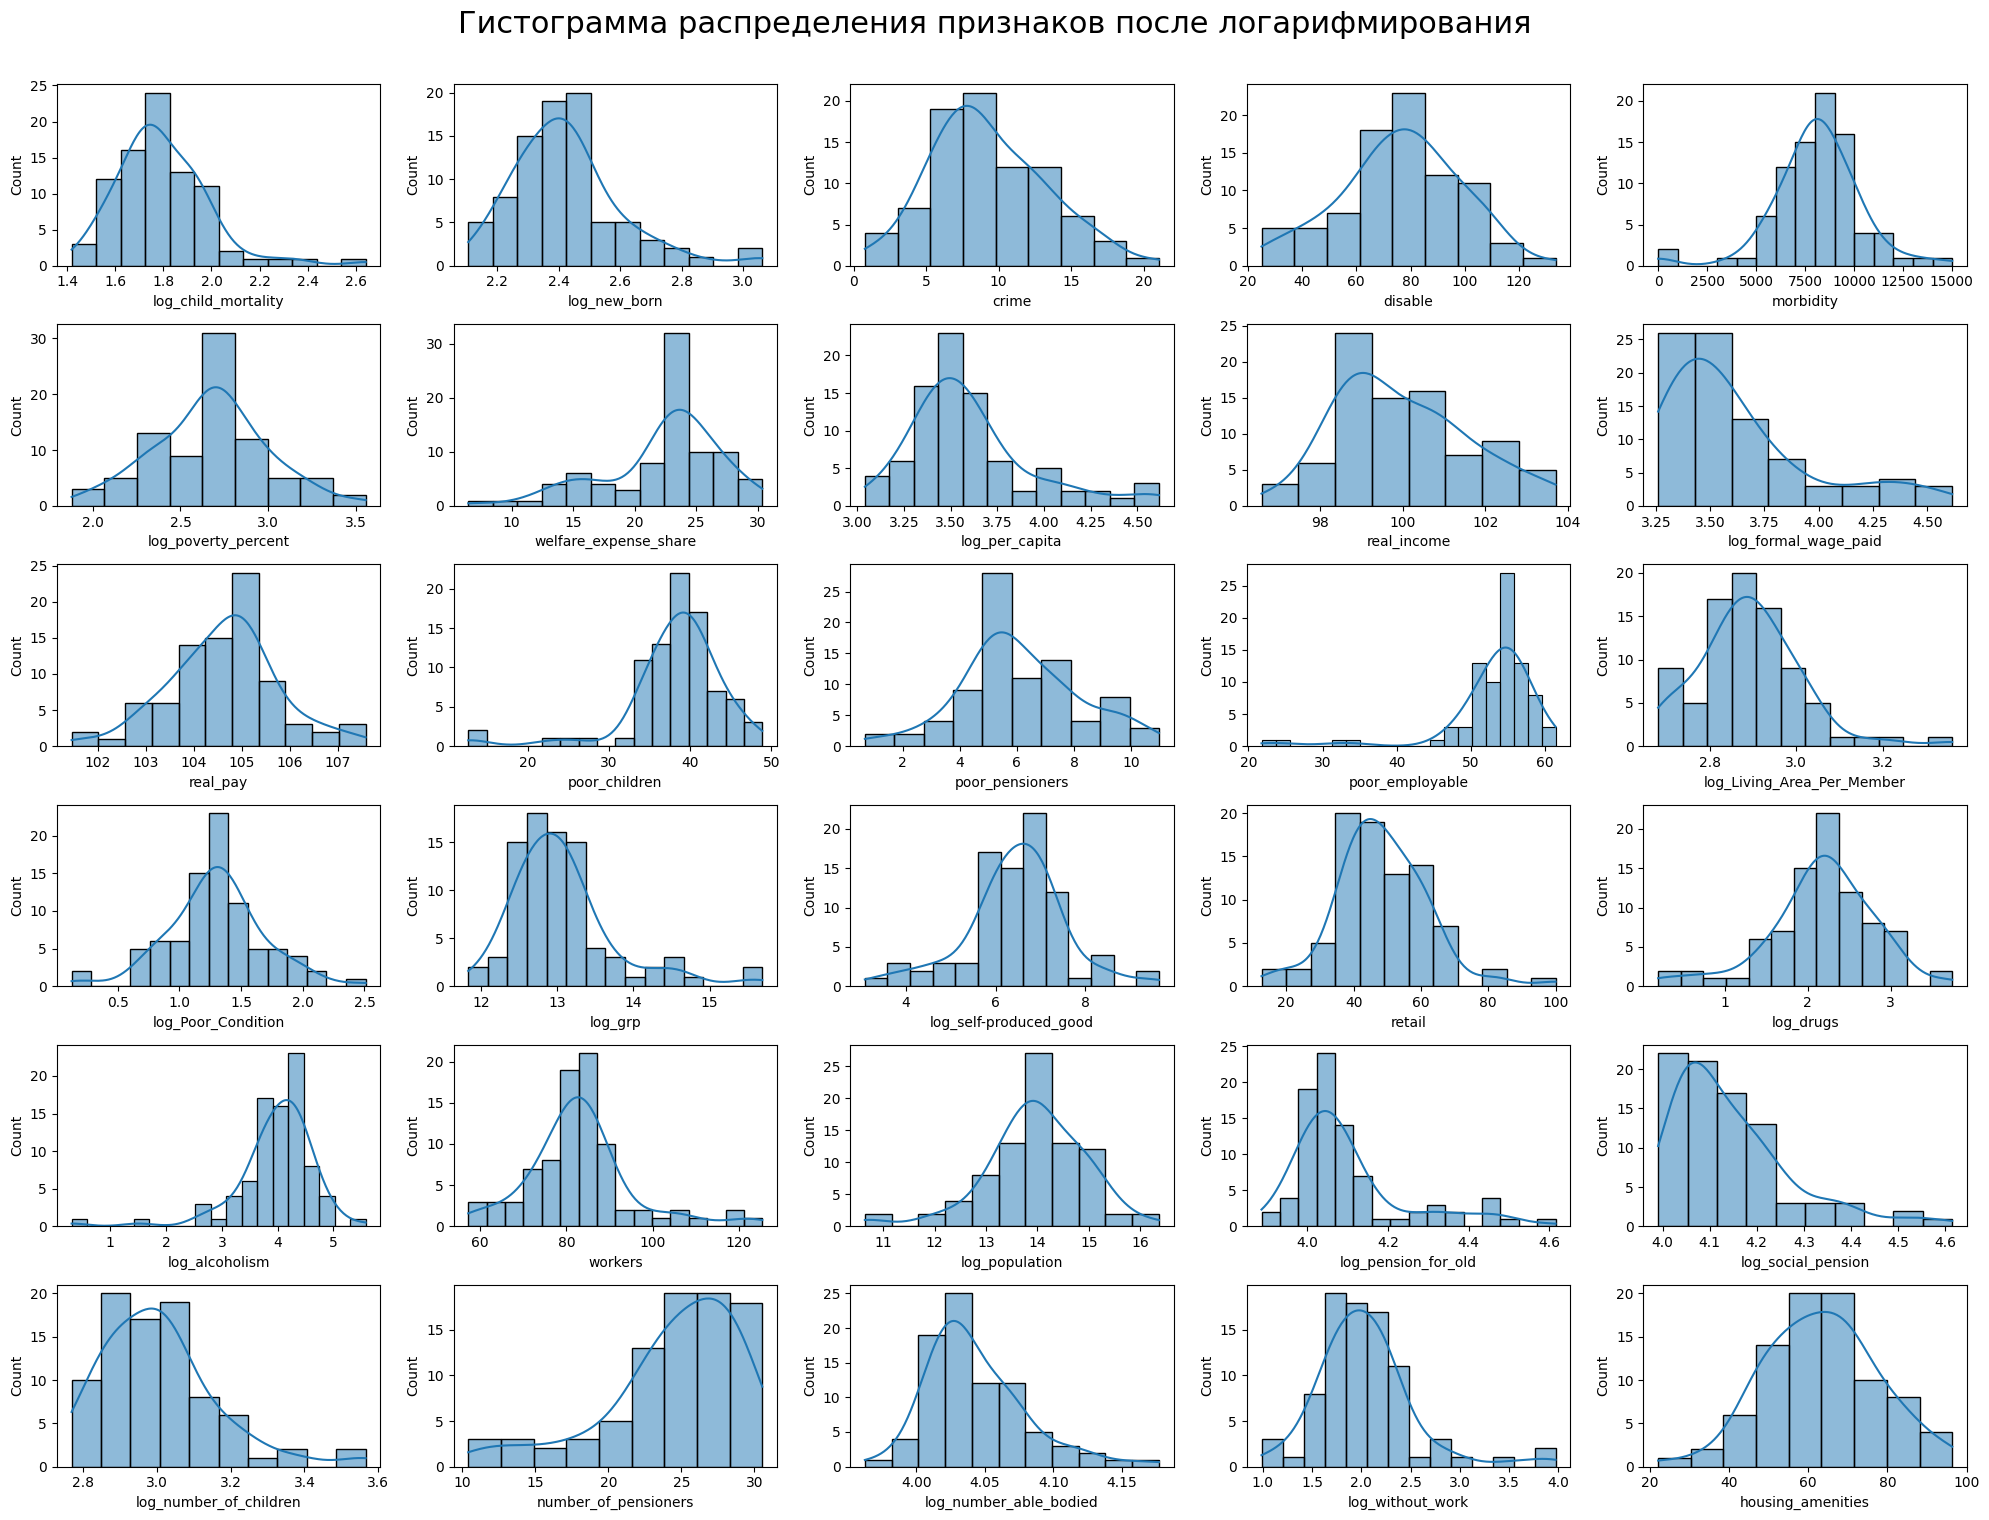

In [324]:
rows = 6
cols= 5

hist_data = log_combined_data

fig,axes = plt.subplots(rows,cols,figsize=(20,15))
axes = axes.flatten()

for i,col in enumerate(hist_data.columns):
    sns.histplot(data=hist_data,x=col,kde=True,ax=axes[i])
plt.suptitle('Гистограмма распределения признаков после логарифмирования',fontsize=22,x=0.5,y=1.01)
plt.tight_layout()

## **Базовая модель**

В первую очередь посмотрим на корреляцию признаков, какие признаки хорошо взаимосвязаны друг с другом

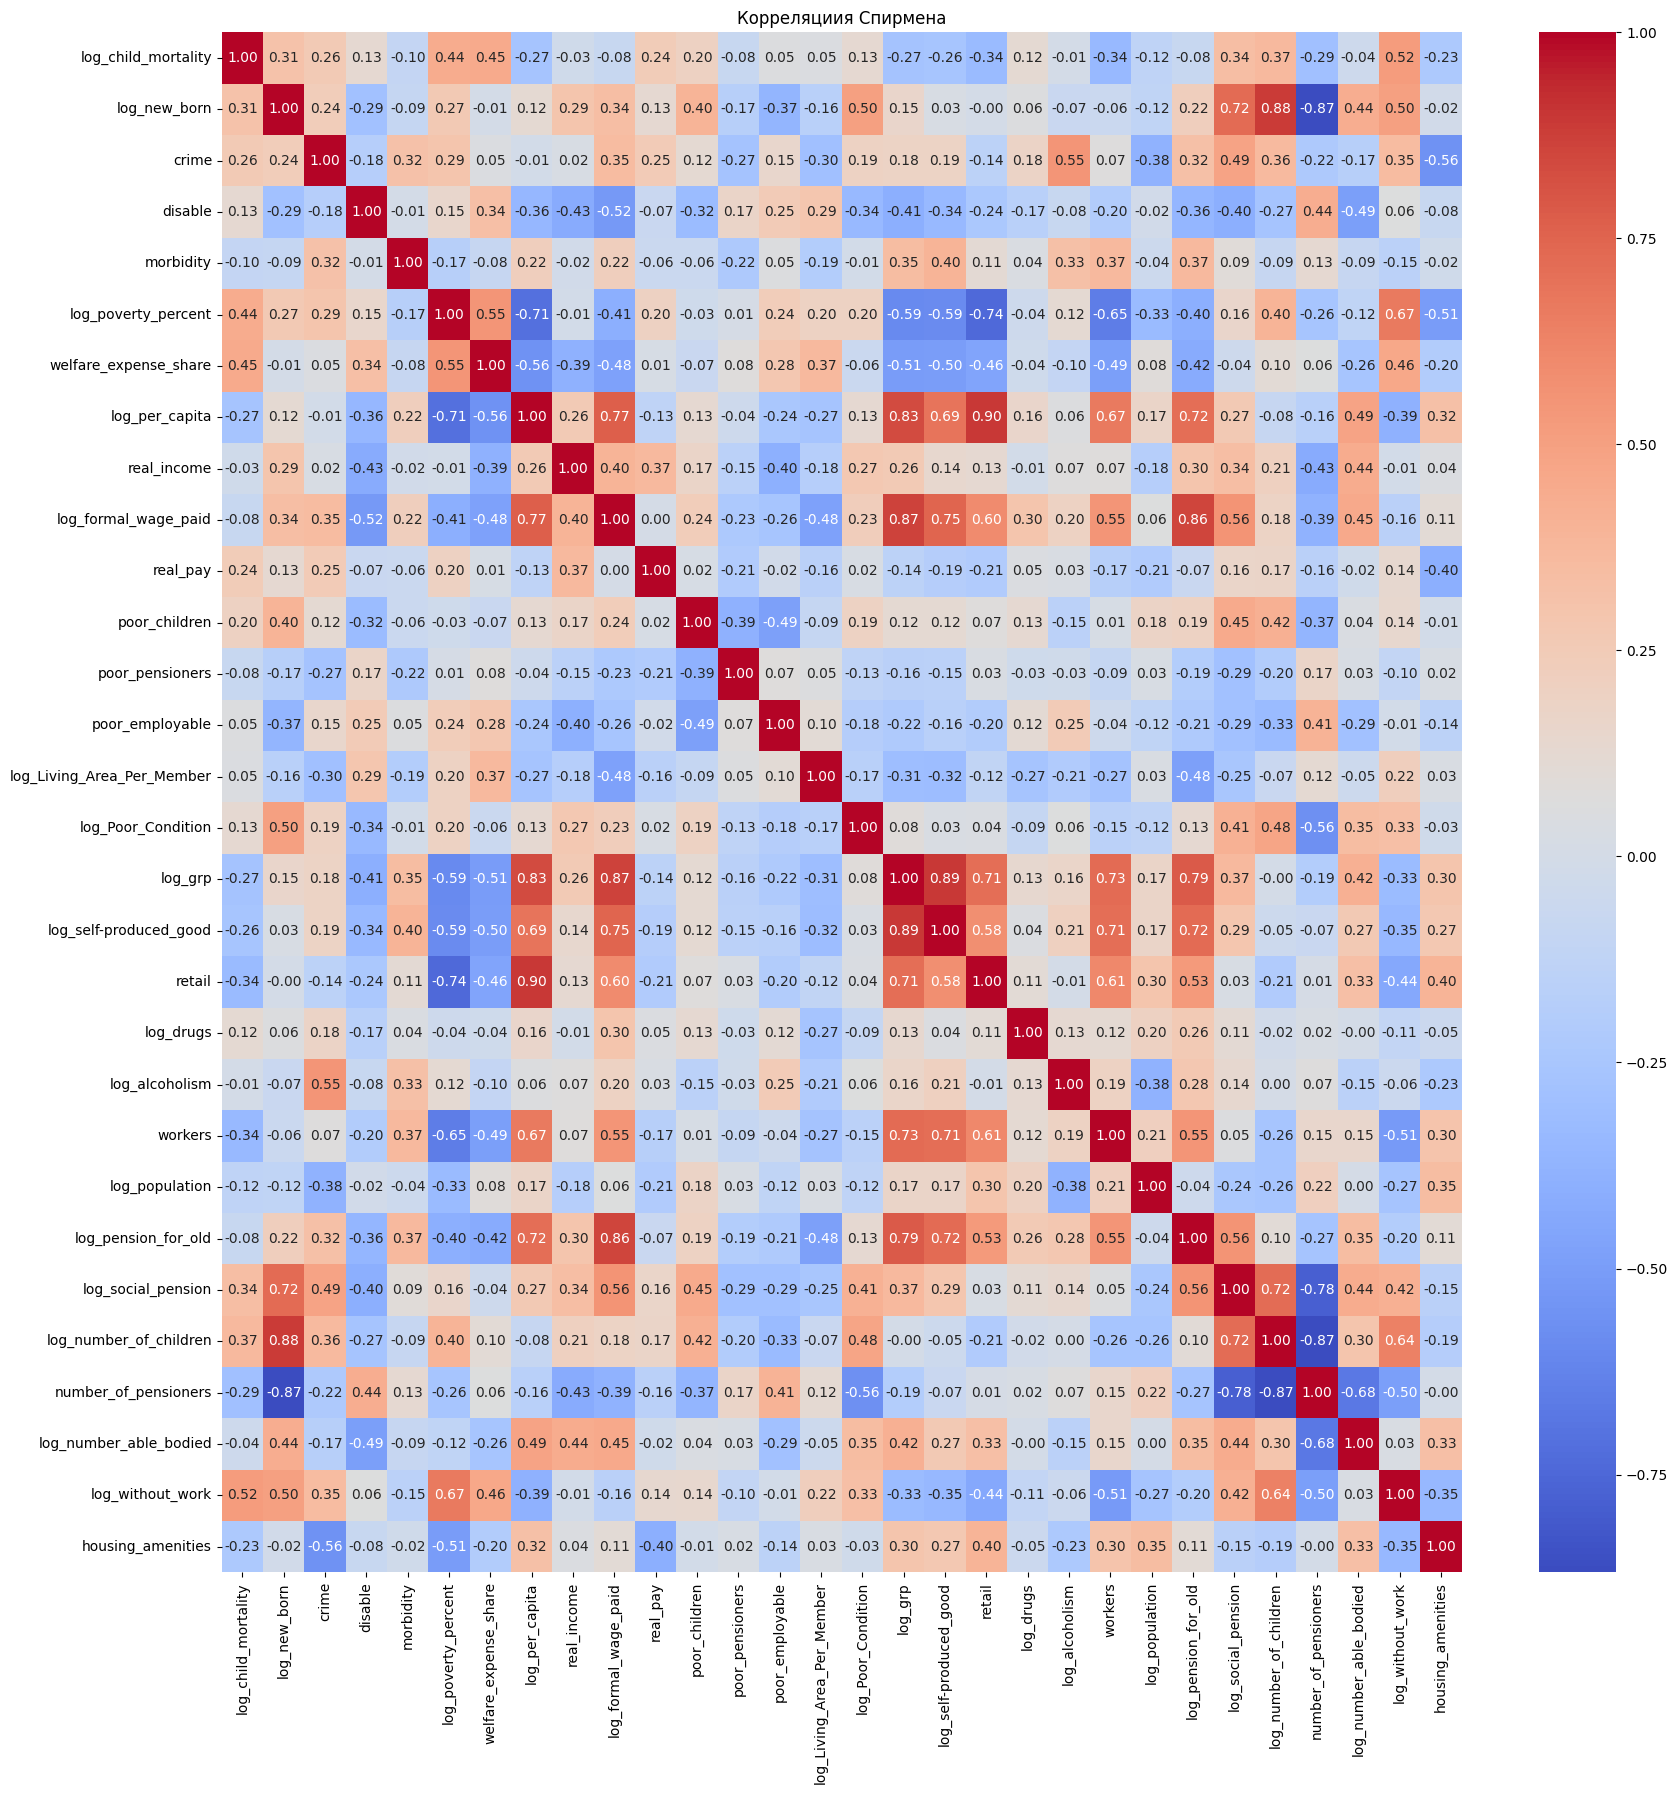

In [325]:
plt.figure(figsize=(20,20))
sns.heatmap(log_combined_data.corr(method='spearman'),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Корреляциия Спирмена')
plt.show()

In [326]:
# Инициализируем пустой список для хранения пар высококоррелированных признаков
corr_list = []

# Проходим по индексам (строкам) корреляционной матрицы
for idx in log_combined_data.corr().index:
    # Проходим по столбцам корреляционной матрицы
    for col in log_combined_data.corr().columns:
        # Проверяем, если абсолютное значение корреляции больше 0.8 и индексы не совпадают
        if abs(log_combined_data.corr().loc[idx, col]) > 0.8 and idx != col:
            # Добавляем пару (idx, col) в список корреляций
            corr_list.append((idx, col))

# Удаляем дубликаты пар, которые являются обратными друг другу
for i in range(len(corr_list)):
    for j in range(len(corr_list)):
        # Проверяем, если пара corr_list[i] равна обратной паре corr_list[j]
        if corr_list[i] == corr_list[j][::-1]:
            # Заменяем обратную пару на оригинальную
            corr_list[j] = corr_list[i]

# Приводим список к уникальным значениям, удаляя дубликаты
corr_list = list(set(corr_list))


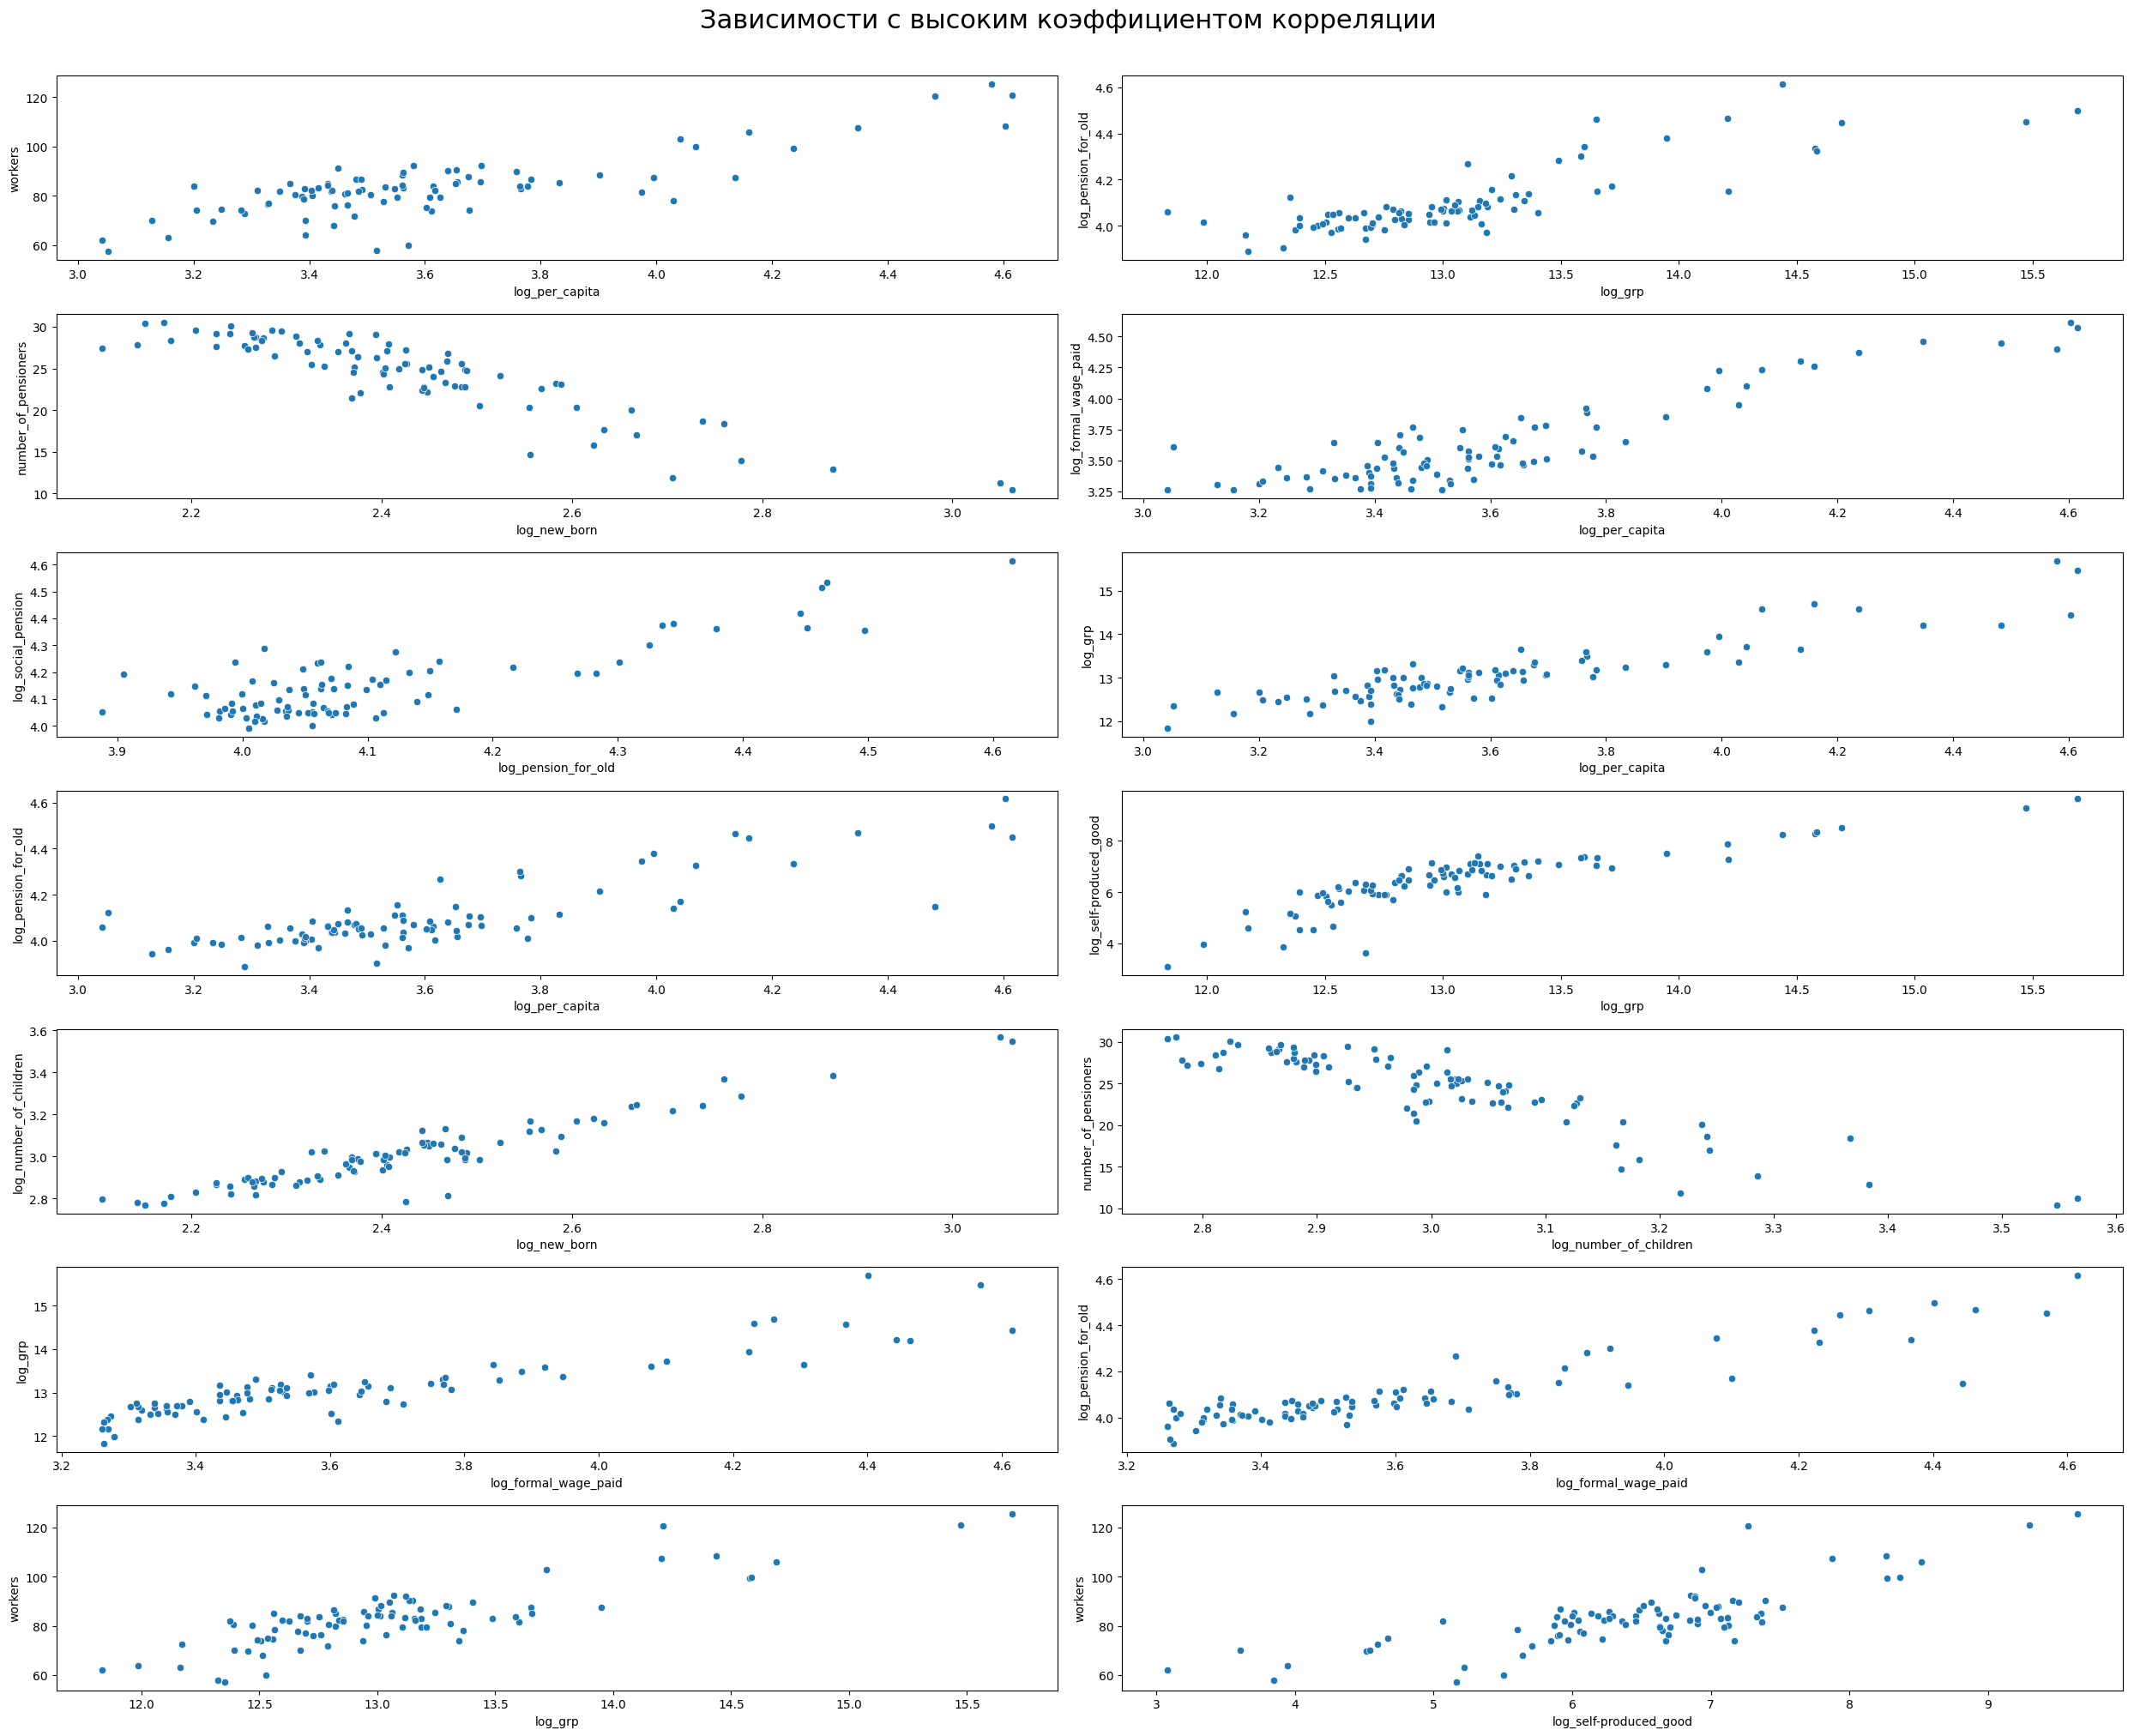

In [327]:
rows = 7
cols= 2

fig,axes = plt.subplots(rows,cols,figsize=(25,20))
plt.suptitle('Зависимости с высоким коэффициентом корреляции', fontsize=22,x=0.5,y=1.01)
axes = axes.flatten()

for idx,col in enumerate(corr_list):
    sns.scatterplot(data=log_combined_data,x=col[0],y=col[1],ax=axes[idx])
plt.tight_layout()

Признак grp (валовый региональный продукт) коррелирует со многими экономическими признаками, такими как log_formal_wage_paid (среднемесячная номинальная начисленная заработная плата на человека),log_per_capita (среднемесячный денежный доход на человека), с long_self-produced_good (региональное производство по всем видам деятельности на душу населения). Среднемесячная номинальная начисленная заработная плата на человека коррелирует с среднемесячный денежный доход на человека.

Поскольку нельзя сказать, что данные распределены нормально, и в данных имеются выбросы, необходимо уменьшить их влияние, поэтому мной будет произведена нормализация классом RobustScaler. Также сильно коррелированные признаки удалены не будут, и поэтому будет применена техника уменьшения размерности PCA. Однако, мной будет испробован другой подход для снижения размерности. Условно я поделил датасет на 3 группы: 

1. "ВРП и производство"
 
2. "Социальные показатели"

3. "Экономические показатели"

Такой подход  позволяет интерпретировать полученные компоненты в контексте каждой группы. Например, первая главная компонента в группе "ВРП и производство" может отражать общий уровень экономического развития региона, комбинируя информацию о ВРП и объеме производства. Это гораздо проще интерпретировать, чем компоненту, полученную из всех 30 признаков сразу, которая может быть сложной комбинацией различных факторов.

In [328]:

#первая компонента - ВРП и производство
x1 = log_combined_data[['log_grp', 'log_self-produced_good']]

#Вторая - социальная
x2 = log_combined_data[['log_child_mortality', 'log_new_born', 'crime', 'disable', 'morbidity','poor_children',
       'poor_pensioners', 'poor_employable', 'log_drugs', 'log_alcoholism','log_population','log_number_of_children',
       'number_of_pensioners', 'log_number_able_bodied', 'log_without_work','workers','log_Living_Area_Per_Member', 'log_Poor_Condition',
       'housing_amenities']]
#Третья - экономическая
x3 = log_combined_data[[col for col in log_combined_data.columns if col not in x1.columns and col not in x2.columns]]


In [329]:
#Применим нормализацию и понижение размерности до одного компонента в нутри каждой группы
pipe = Pipeline([('scaler',RobustScaler()),('PCA',PCA(n_components=1))])

In [330]:
#Применим преобразование 
x1 = pipe.fit_transform(x1)
x2 = pipe.fit_transform(x2)
x3 = pipe.fit_transform(x3)


#соединим данные 
x = np.column_stack([x1,x2,x3])

In [331]:
#размерность получившихся признаков
x.shape

(85, 3)

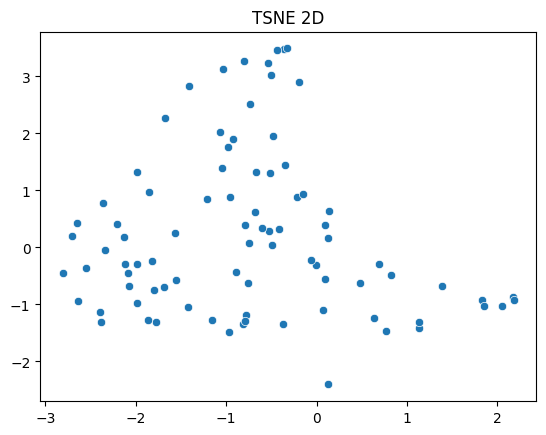

In [332]:
#Посмотрим как распределены данные методом TSNE для графика
tsne = TSNE(n_components=2, perplexity=50, init='pca',
                learning_rate='auto', random_state=42)
X_tsne = tsne.fit_transform(x)
    
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], palette='bright')
plt.title('TSNE 2D')
plt.show()

Точки распределены хаотично, и за исключением некоторых, находятся не так далеко друг от друга, и данные, как кажется будут плохо поддаваться кластеризации

In [333]:
def make_scatterplot_tsne(X, labels, **kwargs):
    # Инициализация t-SNE для снижения размерности до 2D
    tsne = TSNE(n_components=2, perplexity=50,
                learning_rate='auto', random_state=42)
    
    # Применение t-SNE к данным X
    X_tsne = tsne.fit_transform(X)
    
    # Преобразование результата в DataFrame и добавление меток
    X_tsne = pd.DataFrame(X_tsne)
    X_tsne['labels'] = labels
    
    # Построение разброса с использованием seaborn
    sns.scatterplot(x=X_tsne.iloc[:, 0], y=X_tsne.iloc[:, 1], hue=X_tsne['labels'], palette='bright')
    
    # Установка заголовка графика из аргументов
    plt.title(kwargs.get('title'))
    plt.legend(loc=[0.89,0.78])
    # Отображение графика
    plt.show()


In [334]:
def get_kmeans_clustering(X):
    """Функция для поиска оптимального 
    количества кластеров с помощью 
    различных показателей и графиков 
    по методу kmeans"""
    
    # Списки для хранения значений метрик кластеризации
    silhouette = []
    inertia = []
    calinski_harabasz = []   
    davies_bouldin = []      

    # Перебор количества кластеров от 2 до 10
    for i in range(2, 11):
        # Инициализация KMeans с заданным количеством кластеров
        kmeans = KMeans(n_clusters=i, random_state=42) 
        
        # Обучение модели KMeans на данных X
        kmeans.fit(X)
        
        # Вычисление и добавление значения коэффициента силуэта
        silhouette.append((i, silhouette_score(X, kmeans.labels_)))
        
        # Вычисление и добавление значения индекса Дэвиса — Болдина
        davies_bouldin.append((i, davies_bouldin_score(X, kmeans.labels_)))
        
        # Вычисление и добавление значения индекса Калински — Харабаса
        calinski_harabasz.append((i, calinski_harabasz_score(X, kmeans.labels_)))
        
        # Добавление значения инерции (сумма квадратов расстояний до центров кластеров)
        inertia.append(kmeans.inertia_)
    
    # Поиск наилучших результатов по метрикам
    silhoeutte_result = sorted(silhouette, key=lambda x: -x[1])[0]
    calinski_harabasz_result = sorted(calinski_harabasz, key=lambda x: -x[1])[0]
    davies_bouldin_result = sorted(davies_bouldin, key=lambda x: x[1])[0]
    
    # Вывод результатов наилучших метрик
    print(f'Silhouette: количество кластеров {silhoeutte_result[0]}, коэффициент {np.round(silhoeutte_result[1], 3)}')
    print(f'Индекс Калински — Харабаса: количество кластеров {calinski_harabasz_result[0]}, индекс {np.round(calinski_harabasz_result[1], 3)}')
    print(f'Индекс Дэвиса — Болдина: количество кластеров {davies_bouldin_result[0]}, индекс {np.round(davies_bouldin_result[1], 3)}')
    
    # Создание графиков для визуализации результатов
    fig, axes = plt.subplots(1, 4, figsize=(24, 5))      
    
    # График коэффициента силуэта
    sns.lineplot(x=range(2, 11), y=[element[1] for element in silhouette], marker='o', ax=axes[0])
    axes[0].grid(True)
    axes[0].set_title('Коэффициент Силуэта')
    
    # График метода локтя (инерция)
    sns.lineplot(x=range(2, 11), y=inertia, marker='o', ax=axes[1])
    axes[1].grid(True)
    axes[1].set_title('Метод локтя')
    
    # График индекса Калински — Харабаса
    sns.lineplot(x=range(2, 11), y=[element[1] for element in calinski_harabasz], marker='o', ax=axes[2])
    axes[2].grid(True)
    axes[2].set_title('Индекс Калински — Харабаса')
    
    # График индекса Дэвиса — Болдина
    sns.lineplot(x=range(2, 11), y=[element[1] for element in davies_bouldin], marker='o', ax=axes[3])
    axes[3].grid(True)
    axes[3].set_title('Индекс Дэвиса — Болдина')
    
    # Настройка макета графиков и отображение их на экране
    plt.tight_layout()
    plt.show()

    

Silhouette: количество кластеров 3, коэффициент 0.526
Индекс Калински — Харабаса: количество кластеров 3, индекс 89.388
Индекс Дэвиса — Болдина: количество кластеров 3, индекс 0.694


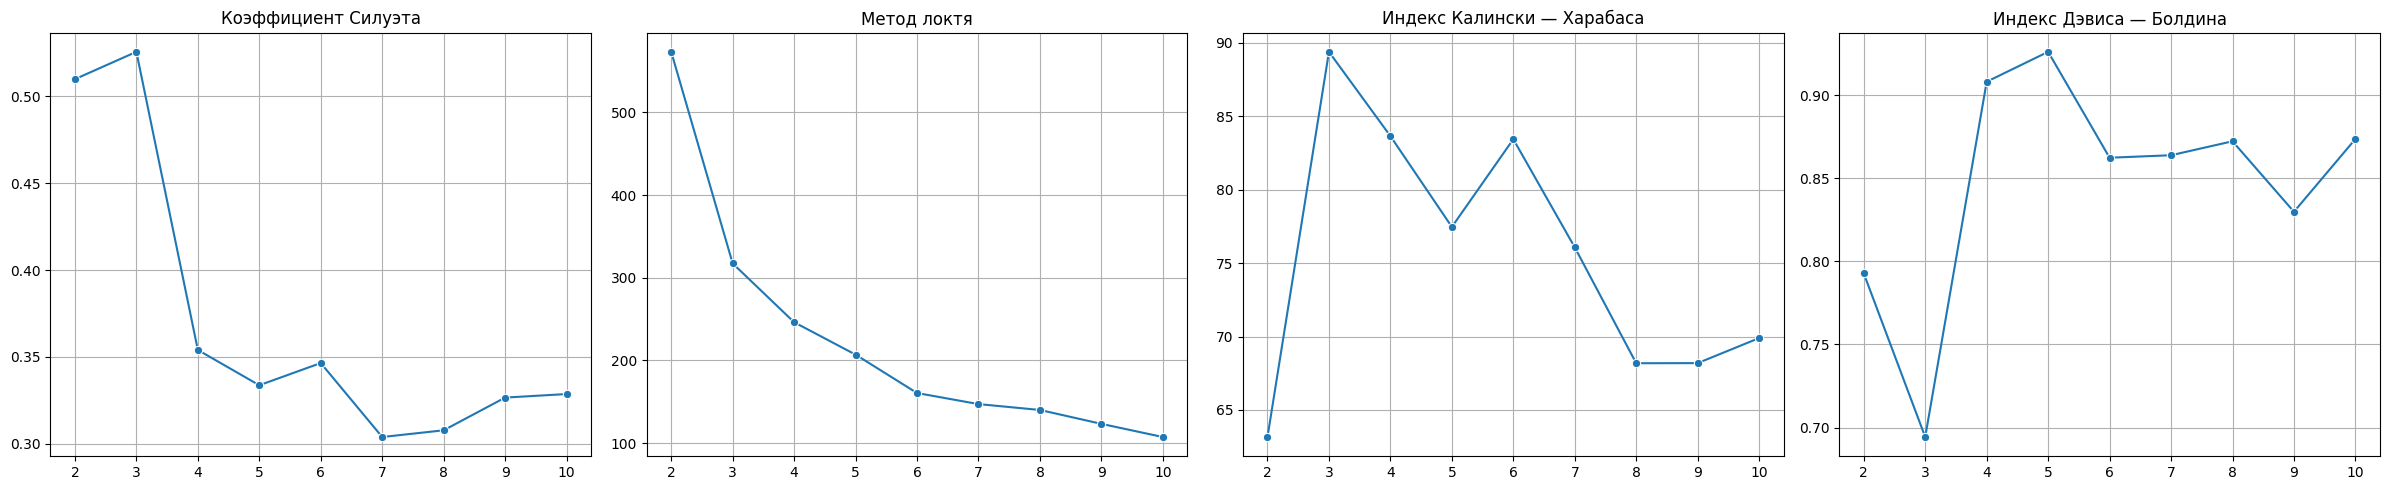

In [335]:
get_kmeans_clustering(x)

Все показатели метрик, которые имеют неплохие показатели, говорят о том, что число кластеров должно равнятся 3

In [336]:
kmeans = KMeans(n_clusters=3,random_state=42) 
kmeans_labels = kmeans.fit_predict(x)

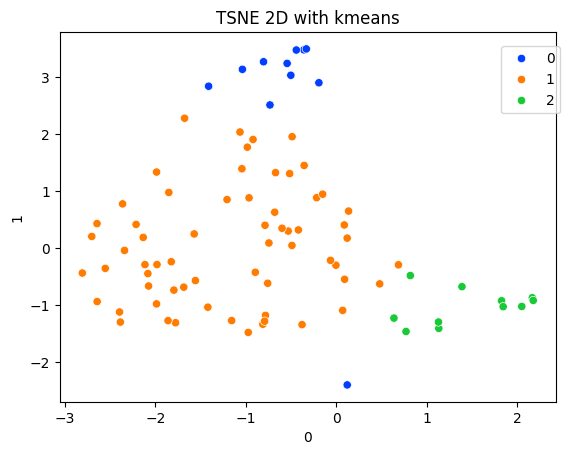

In [337]:
make_scatterplot_tsne(x,labels=kmeans_labels,title='TSNE 2D with kmeans')

## Тестирование различных алгоритмов кластеризации, валидация

In [301]:
def get_gmm_clustering(X):
    """Функция для поиска оптимального 
    количества кластеров с помощью 
    различных показателей
     EM-алгоритма"""
   
    # Списки для хранения значений метрик кластеризации
    silhouette = []
    calinski_harabasz = []   
    davies_bouldin = []      
    
    # Перебор количества компонентов (кластеров) от 2 до 10
    for i in range(2, 11):
        # Инициализация модели Gaussian Mixture с заданным количеством компонентов
        gmm = GaussianMixture(n_components=i, random_state=42) 
        
        # Обучение модели и получение меток кластеров для данных X
        labels = gmm.fit_predict(X)
        
        # Вычисление и добавление значения коэффициента силуэта
        silhouette.append(silhouette_score(X, labels))
        
        # Вычисление и добавление значения индекса Дэвиса — Болдина
        davies_bouldin.append(davies_bouldin_score(X, labels))
        
        # Вычисление и добавление значения индекса Калински — Харабаса
        calinski_harabasz.append(calinski_harabasz_score(X, labels))
        
    # Поиск наилучших результатов по метрикам
    silhoeutte_result = sorted(silhouette)[-1]
    calinski_harabasz_result = sorted(calinski_harabasz)[-1]
    davies_bouldin_result = sorted(davies_bouldin)[0]
 
    
    # Вывод результатов наилучших метрик
    print(f'Коэффициент силуэта {np.round(silhoeutte_result,3)}')
    print(f'Индекс Калински — Харабаса: {np.round(calinski_harabasz_result,3)}')
    print(f'Индекс Дэвиса — Болдина: {np.round(davies_bouldin_result,3)}')
    
    # визуализируем коэффициенты силуэта для разного количества кластеров
    plt.xlabel("cluster", fontsize=12)
    plt.ylabel("silhouette", fontsize=12)
    plt.plot([i for i in range(2, 11)], silhouette, 'xb-')
    plt.grid(True)
    plt.show()
  

Коэффициент силуэта 0.433
Индекс Калински — Харабаса: 64.739
Индекс Дэвиса — Болдина: 0.871


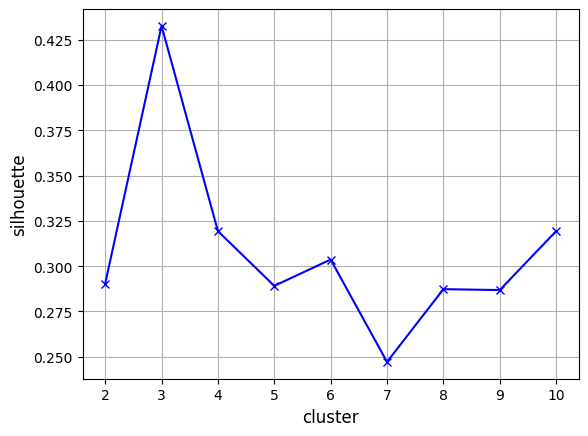

In [338]:
get_gmm_clustering(x)

EM-алгоритм сработал по показателям хуже, чем алгоритм kmeans, а также плохо разделил пространство кластеров

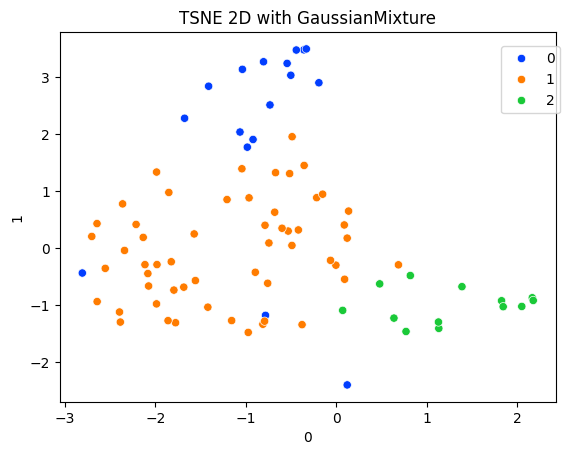

In [339]:
gmm = GaussianMixture(n_components=3,random_state=42) 
gmm_labels = gmm.fit_predict(x)

make_scatterplot_tsne(x,labels=gmm_labels,title='TSNE 2D with GaussianMixture')

In [340]:
print(f'Индекс Рэнда в сравнении с базовой моделью составляет {rand_score(kmeans_labels,gmm_labels)}')

Индекс Рэнда в сравнении с базовой моделью составляет 0.8487394957983193


In [341]:
def get_agglomerative_clustering(X):
    """Функция для поиска оптимального 
    количества кластеров с помощью 
    различных показателей и графиков 
    с помощью Агломеративной иерархической кластеризации"""
   
# Списки для хранения значений метрик кластеризации
    silhouette = []
    calinski_harabasz = []   
    davies_bouldin = []      
    
    # Перебор количества компонентов (кластеров) от 2 до 10
    for i in range(2, 11):
        # Инициализация модели Gaussian Mixture с заданным количеством компонентов
        gmm = AgglomerativeClustering(linkage='complete', n_clusters=i) 
        
        # Обучение модели и получение меток кластеров для данных X
        labels = gmm.fit_predict(X)
        
        # Вычисление и добавление значения коэффициента силуэта
        silhouette.append(silhouette_score(X, labels))
        
        # Вычисление и добавление значения индекса Дэвиса — Болдина
        davies_bouldin.append(davies_bouldin_score(X, labels))
        
        # Вычисление и добавление значения индекса Калински — Харабаса
        calinski_harabasz.append(calinski_harabasz_score(X, labels))
        
    # Поиск наилучших результатов по метрикам
    silhoeutte_result = sorted(silhouette)[-1]
    calinski_harabasz_result = sorted(calinski_harabasz)[-1]
    davies_bouldin_result = sorted(davies_bouldin)[0]
    
    # Вывод результатов наилучших метрик
    print(f'Коэффициент силуэта {np.round(silhoeutte_result,3)}')
    print(f'Индекс Калински — Харабаса: {np.round(calinski_harabasz_result,3)}')
    print(f'Индекс Дэвиса — Болдина: {np.round(davies_bouldin_result,3)}')
    
    # визуализируем коэффициенты силуэта для разного количества кластеров
    plt.xlabel("cluster", fontsize=12)
    plt.ylabel("silhouette", fontsize=12)
    plt.plot([i for i in range(2, 11)], silhouette, 'xb-')
    plt.grid(True)
    plt.show()

Коэффициент силуэта 0.51
Индекс Калински — Харабаса: 76.526
Индекс Дэвиса — Болдина: 0.691


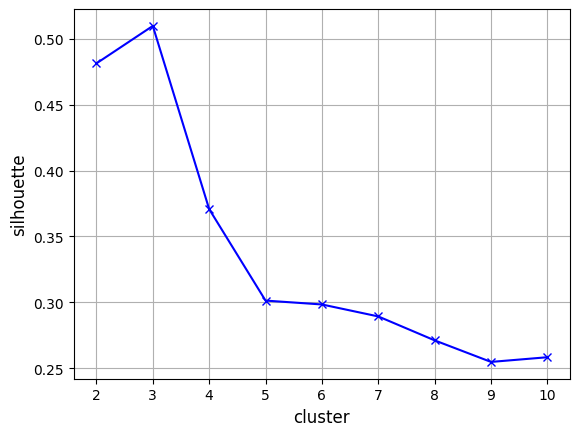

In [342]:
get_agglomerative_clustering(x)

In [343]:
agg = AgglomerativeClustering(linkage='complete', n_clusters=3)    
agg_labels = agg.fit_predict(x)

print(f'Индекс Рэнда в сравнении с базовой моделью составляет {rand_score(kmeans_labels,agg_labels)}')

Индекс Рэнда в сравнении с базовой моделью составляет 0.7974789915966387


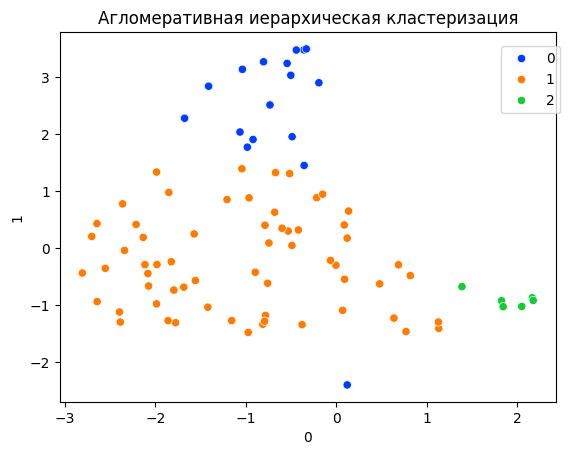

In [344]:
make_scatterplot_tsne(x,agg_labels,title='Агломеративная иерархическая кластеризация')

Результаты по различным метрикам кластеризации практически такая же как и у базовой, по метрикам, немного уступает

In [345]:
def get_spectral_clustering(X):
    """Функция для поиска оптимального 
    количества кластеров с помощью 
    различных показателей и графиков 
    с помощью спектральной кластеризации"""
    # Инициализация списков для хранения метрик
    silhouette = []
    calinski_harabasz = []   
    davies_bouldin = []      
    
    # Перебор количества компонентов (кластеров) от 2 до 10
    for i in range(2, 11):
        # Инициализация модели Gaussian Mixture с заданным количеством компонентов
        gmm = SpectralClustering(n_clusters=i) 
        
        # Обучение модели и получение меток кластеров для данных X
        labels = gmm.fit_predict(X)
        
        # Вычисление и добавление значения коэффициента силуэта
        silhouette.append(silhouette_score(X, labels))
        
        # Вычисление и добавление значения индекса Дэвиса — Болдина
        davies_bouldin.append(davies_bouldin_score(X, labels))
        
        # Вычисление и добавление значения индекса Калински — Харабаса
        calinski_harabasz.append(calinski_harabasz_score(X, labels))
        
    # Поиск наилучших результатов по метрикам
    silhoeutte_result = sorted(silhouette)[-1]
    calinski_harabasz_result = sorted(calinski_harabasz)[-1]
    davies_bouldin_result = sorted(davies_bouldin)[0]
 
    
    # Вывод результатов наилучших метрик
    print(f'Коэффициент силуэта {silhoeutte_result}')
    print(f'Индекс Калински — Харабаса: {calinski_harabasz_result}')
    print(f'Индекс Дэвиса — Болдина: {davies_bouldin_result}')

    

In [346]:
get_spectral_clustering(x)

Коэффициент силуэта 0.5609918516334428
Индекс Калински — Харабаса: 56.97633852424606
Индекс Дэвиса — Болдина: 0.4152125653140901


In [347]:
spectral = SpectralClustering(n_clusters=3)
        
# Применение кластеризации к данным и получение меток кластеров
spectral_labels = spectral.fit_predict(x)

print(f'Индекс Рэнда в сравнении с базовой моделью составляет {rand_score(kmeans_labels,spectral_labels)}')

Индекс Рэнда в сравнении с базовой моделью составляет 0.6680672268907563


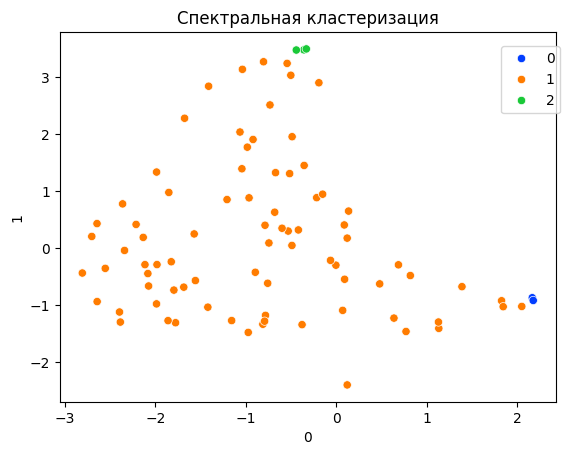

In [348]:
make_scatterplot_tsne(x,spectral_labels,title='Спектральная кластеризация')

Несмотря на то, что метрики показывают результат, лучше, чем при других моделях, модель показывает не самую лучшую разделяемость на графике

Применение лучшей модели

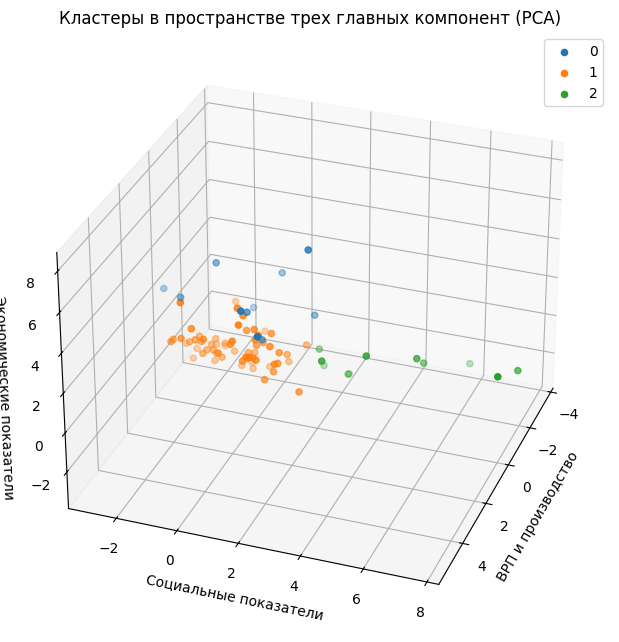

In [349]:
# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)
ax.azim = 20
ax.elev = 30

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
for label in np.unique(kmeans_labels):
    ax.scatter(
        x[kmeans_labels == label, 0],
        x[kmeans_labels == label, 1],
        x[kmeans_labels == label, 2],
        label=label
    )
# добавим оси
ax.set_xlabel('ВРП и производство')
ax.set_ylabel('Социальные показатели')
ax.set_zlabel('Экономические показатели')
ax.set_title('Кластеры в пространстве трех главных компонент (PCA)')
ax.legend();

In [350]:
pca_kmeans = combined_data.copy()
pca_kmeans['Cluster'] = kmeans_labels


In [351]:
pca_kmeans['Cluster'].value_counts()

Cluster
1    63
2    11
0    11
Name: count, dtype: int64

Самый большой кластер это первый кластер, в который попало 63 региона, второй и третий кластер взяли в себя по 11 регионов

## **Продолжение тестирования различных алгоритмов кластеризации**

Необходимо сравнить остальные методы, к примеру попробовать решить задачу с помощью техники понижения размерности t-sne

In [355]:
pipeline = Pipeline([('scaler',RobustScaler()), ('TSNE', TSNE(n_components=2, perplexity=50, random_state=42))])

tsne_table = pd.DataFrame(pipeline.fit_transform(log_combined_data),columns=['axis-1', 'axis-2'])

In [356]:
# Дивергенция Кульбака-Лейблера после оптимизации
round(pipeline[1].kl_divergence_, 2)

0.07

Дивергенция показывает хороший результат, поскольку дивергенция Кульбака-Лейблера - это функция потерь, которая минимизируется при обучения алгоритма t-SNE. Она показывает меру расстояния между двумя распределениями.

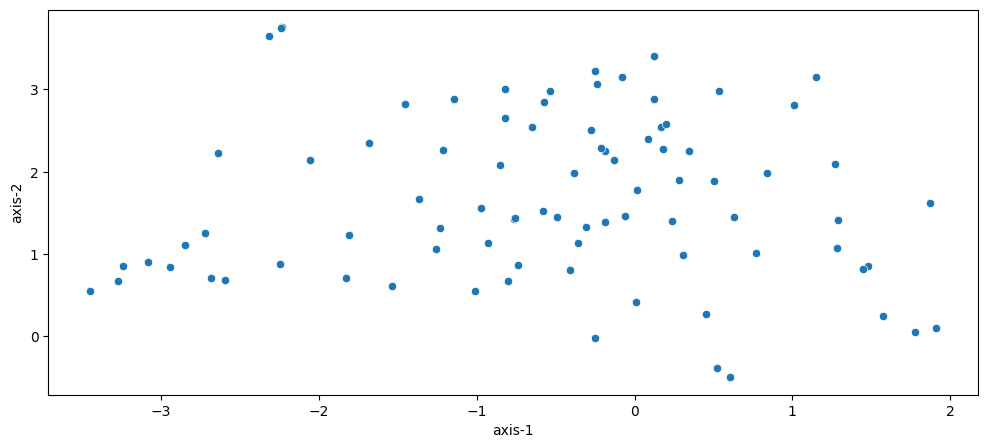

In [357]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=tsne_table, x='axis-1', y='axis-2');

TSNE также как, tsne на pca-объектах показывает разброс точек по пространству, по которому трудно выделить какие-либо кластеры

Silhouette: количество кластеров 5, коэффициент 0.40700000524520874
Индекс Калински — Харабаса: количество кластеров 5, индекс 83.7959976196289
Индекс Дэвиса — Болдина: количество кластеров 9, индекс 0.688


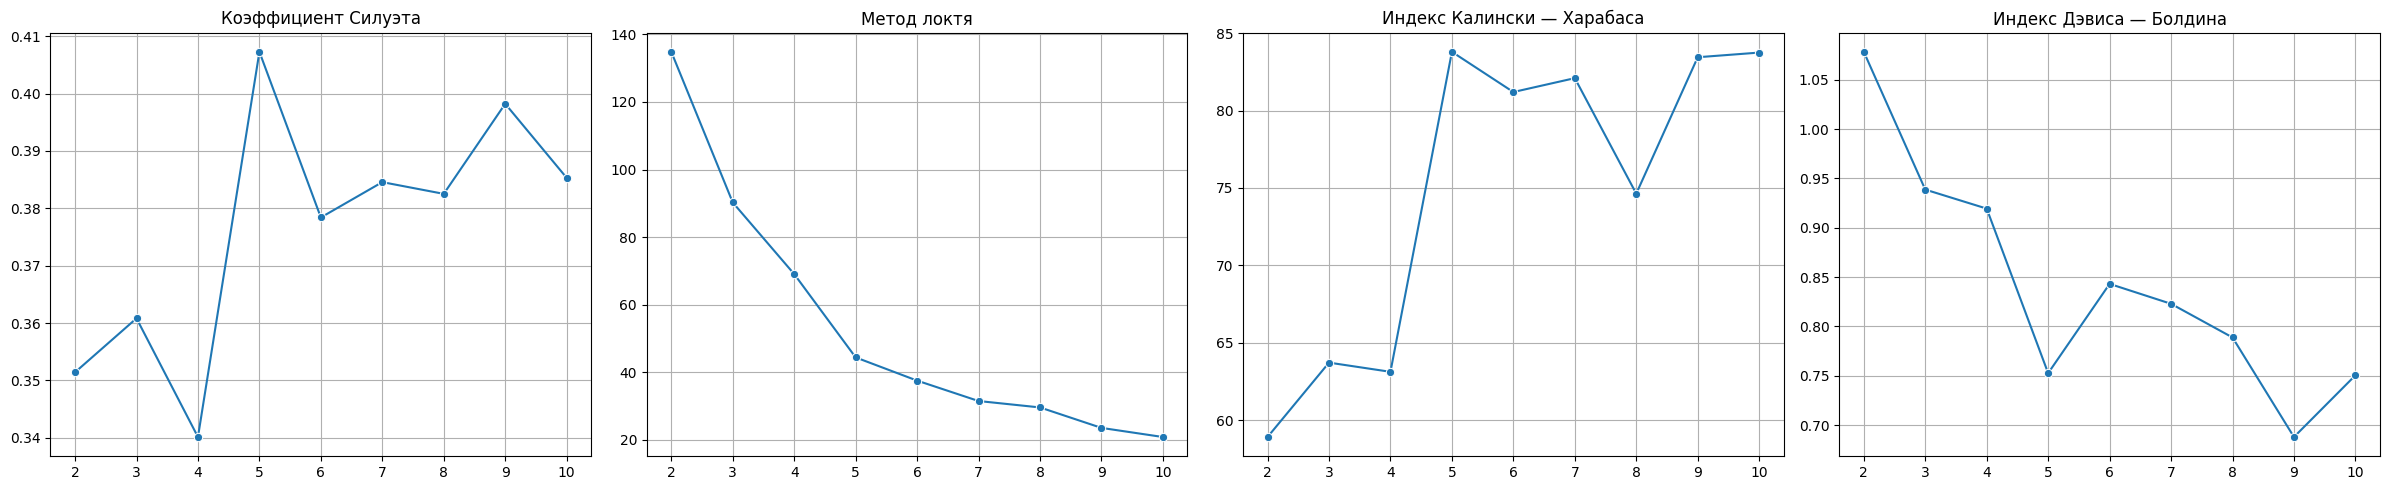

In [358]:
get_kmeans_clustering(tsne_table)

Алгоритм Kmeans в этом случае показывает уже 5 кластеров по всем методам подбора оптимального количества кластеров

Коэффициент силуэта 0.39899998903274536
Индекс Калински — Харабаса: 74.84400177001953
Индекс Дэвиса — Болдина: 0.749


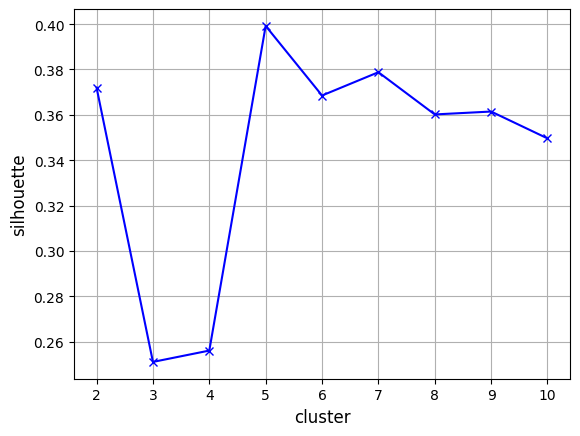

In [359]:
get_gmm_clustering(tsne_table)

Чуть хуже срабатывает Гауссова смесь, по коэффициенту силуэта

Коэффициент силуэта 0.3630000054836273
Индекс Калински — Харабаса: 79.47000122070312
Индекс Дэвиса — Болдина: 0.755


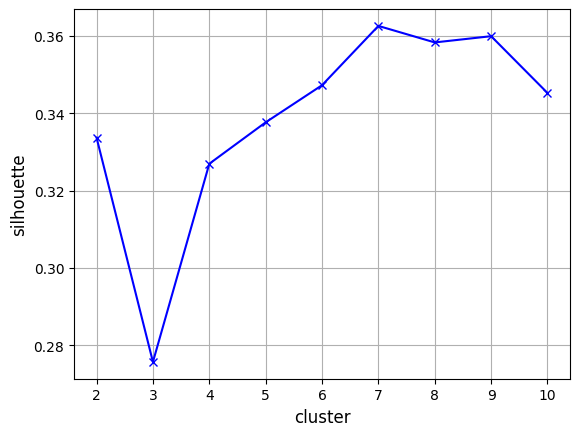

In [360]:
get_agglomerative_clustering(tsne_table)

Оптимальное число кластеров по алгоритмому алгомеративной кластеризации по методу силуэта равняется 6(коэфф. силуэта 0,40), что является чуть менее лучшим результатом, чем по другим алгоритмам кластеризации

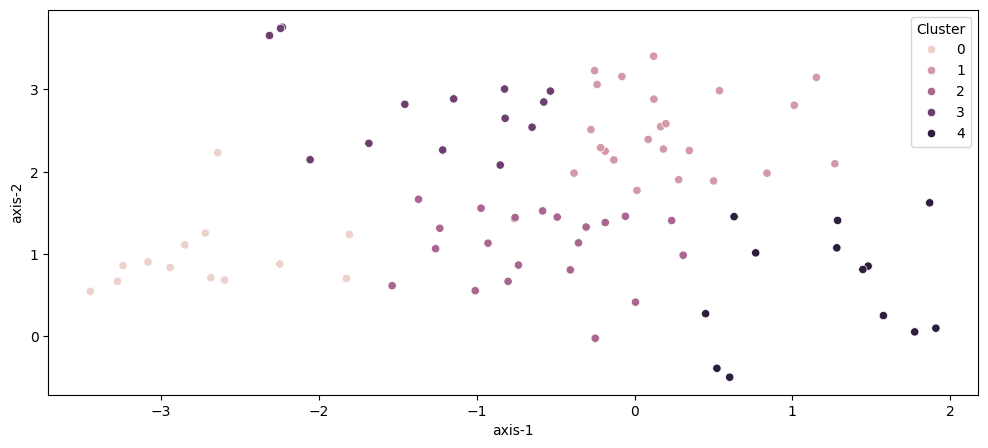

In [361]:
kmeans_tsne =  KMeans(n_clusters=5,random_state=42)
kmeans_tsne.fit(tsne_table)
combined_data_kmeans = combined_data.copy()
combined_data_kmeans['Cluster'] = kmeans_tsne.labels_
tsne_table['Cluster'] = kmeans_tsne.labels_

fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=tsne_table, x='axis-1', y='axis-2', hue='Cluster');

In [362]:
combined_data_kmeans['Cluster'].value_counts()

Cluster
1    23
2    22
3    14
4    13
0    13
Name: count, dtype: int64

Однако, несмотря на разнообразие количества кластеров, получившихся при сочетании методов t-sne и кластеризации, стоит отметить, что показатели метрик слабее, чем при методе PCA и кластеризации, поэтому мной будет выбран данный метод 

In [363]:
combined_data['Cluster'] = kmeans_labels
combined_data.to_csv('social_russia_data/combined_data_clusters.csv')

**На данном шаге мной был произведен выбор оптимального алгоритма кластеризации для данных, включающих в себя 30 социально-экономических признаков. При тестировании различных методов мной был выбран метод PCA и кластеризации методом kmeans, в результате чего, при отборе, получилось 3 кластера.**